In [1]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, levy_stable, ks_2samp

sys.path.insert(1, os.sep.join(["..", "packages"]))
from Levy_processes import *
from basicDistributionFunctions import *
from fractional_stable_motion import *
from mySweetCache import cache


In [2]:
Image_width = 10

In [3]:
N = 10 ** 3
dt = 0.01
T = N * dt # = 10
M = 10 ** 3

t = np.linspace(0, 1, N)
ps = [0.1, 0.3, 0.5, 0.7, 0.9]

# Brownian Motion

# 1.5-stable simetric Levy motin

## quantile lines

### Brownian motion

In [4]:
alpha = 2
beta = 0

X_Brownian_motion = Levy_processes(T, M, N, 2, 0)

In [5]:
@cache("Brounian_empirical_quantile")
def Brounian_empirical_quantile(ps, N, X_Brownian_motion):
    Quantile = np.zeros([len(ps), N])
    for Np, p in enumerate(ps):
        Quantile[Np,:] = np.squeeze(equantile_proces(X_Brownian_motion.T, p))
    return Quantile

@cache("Brounian_teoretical_quantile")
def Brounian_teoretical_quantile(ps, N, alpha, beta, T):
    Quantile_teoretic = np.zeros([len(ps),N])
    for Np, p in enumerate(ps):
        Quantile_teoretic[Np,:] = levy_stable.ppf(p, alpha, beta)

    for k in range(N):
        Quantile_teoretic[:,k] = Quantile_teoretic[:,k] * ((T * k / N) ** (1 / alpha))

    return Quantile_teoretic



In [6]:
Quantile = Brounian_empirical_quantile(ps, N, X_Brownian_motion)
Quantile_teoretic = Brounian_teoretical_quantile(ps, N, alpha, beta, T)


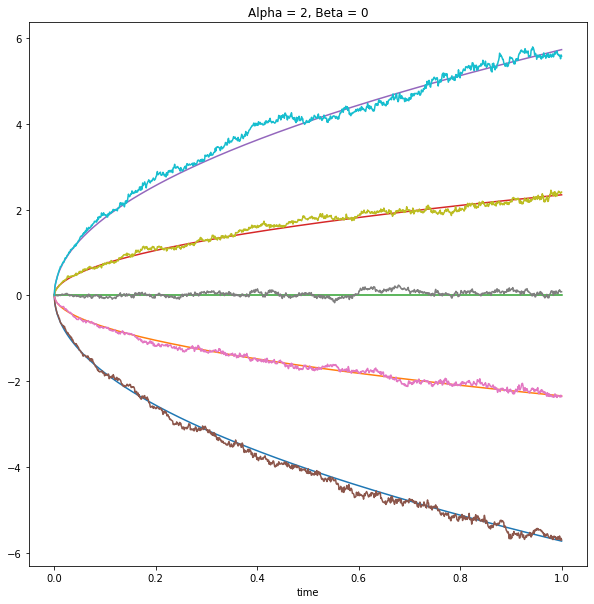

In [7]:
fig_q, axs_q = plt.subplots(nrows = 1, ncols = 1, figsize = ( Image_width, Image_width))
ax_q = axs_q;
ax_q.plot(t, Quantile_teoretic.T);
ax_q.plot(t, Quantile.T);
ax_q.set_xlabel("time")
ax_q.set_title(f"Alpha = {alpha}, Beta = {beta}");


### Alpha-stable 1.5

In [10]:
alpha15 = 1.5
beta15 = 0

X_1_5_stable_motion = Levy_processes(T, M, N, alpha15, beta15)

In [11]:

@cache("Brounian_empirical_quantile")
def Brounian_empirical_quantile(ps, N, X_1_5_stable_motion):
    Quantile = np.zeros([len(ps), N])
    for Np, p in enumerate(ps):
        Quantile[Np,:] = np.squeeze(equantile_proces(X_1_5_stable_motion.T, p))
    return Quantile

@cache("Brounian_teoretical_quantile")
def Brounian_teoretical_quantile(ps, N, alpha15, beta15, T):
    Quantile_teoretic = np.zeros([len(ps),N])
    for Np, p in enumerate(ps):
        Quantile_teoretic[Np,:] = levy_stable.ppf(p, alpha15, beta15)

    for k in range(N):
        Quantile_teoretic[:,k] = Quantile_teoretic[:,k] * ((T * k / N) ** (1 / alpha15))

    return Quantile_teoretic



In [12]:
Quantile15 = Brounian_empirical_quantile(ps, N, X_1_5_stable_motion)
Quantile_teoretic15 = Brounian_teoretical_quantile(ps, N, alpha15, beta15, T)


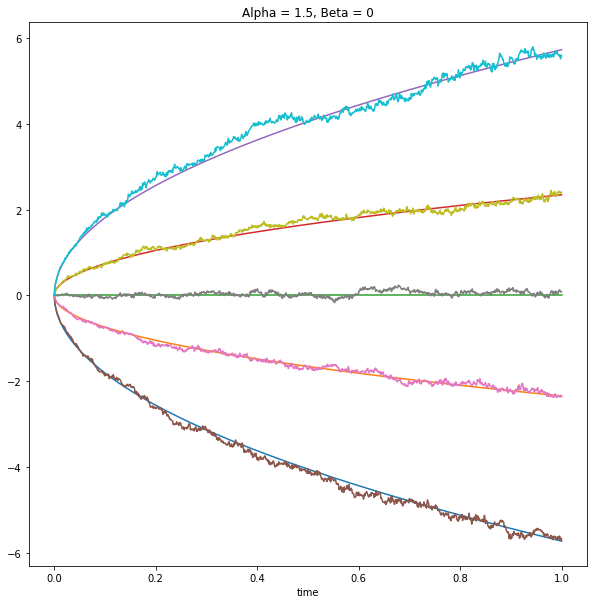

In [13]:
fig_q, axs_q = plt.subplots(nrows = 1, ncols = 1, figsize = ( Image_width, Image_width))
ax_q = axs_q;
ax_q.plot(t, Quantile_teoretic15.T);
ax_q.plot(t, Quantile15.T);
ax_q.set_xlabel("time")
ax_q.set_title(f"Alpha = {alpha15}, Beta = {beta15}");

### Fractional Brownian motion 0.3 & 0.7

In [22]:
alpha = 2
beta = 0
@cache("get_FBS03")
def get_FBS03():
    return integral_form_simulation(0.3, 2, 0, N_trajectories=M)

@cache("get_FBS07")
def get_FBS07():
    return integral_form_simulation(0.7, 2, 0, N_trajectories=M)

FBS_03 = get_FBS03()
FBS_07 = get_FBS07()

In [43]:

@cache("Fractiolnal0_3_quantile")
def Fractiolnal0_3_quantile(ps, N, FBS_03):
    Quantile = np.zeros([len(ps), N-1])
    for Np, p in enumerate(ps):
        Quantile[Np,:] = np.squeeze(equantile_proces(FBS_03, p))
    return Quantile
    
@cache("Fractiolnal0_7_quantile")
def Fractiolnal0_7_quantile(ps, N, FBS_07):
    Quantile = np.zeros([len(ps), N-1])
    for Np, p in enumerate(ps):
        Quantile[Np,:] = np.squeeze(equantile_proces(FBS_07, p))
    return Quantile
    
Quantile_FBS_03 = Fractiolnal0_3_quantile(ps, N, FBS_03[1])
Quantile_FBS_07 = Fractiolnal0_7_quantile(ps, N, FBS_07[1])


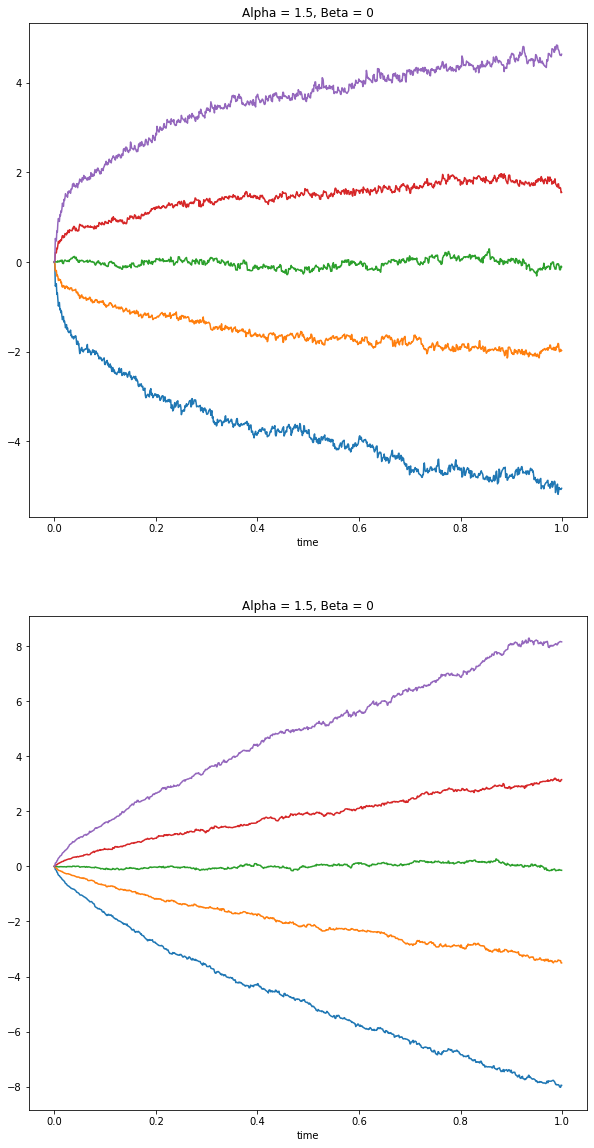

In [47]:
fig_q, axs_q = plt.subplots(nrows = 2, ncols = 1, figsize = ( Image_width, 2 * Image_width))
for i, X in enumerate([Quantile_FBS_03, Quantile_FBS_07]):
    ax_q = axs_q[i]
    ax_q.plot(t[:-1], X.T);
    ax_q.set_xlabel("time")
    ax_q.set_title(f"Alpha = {alpha}, Beta = {beta}");

### Fractional 1.5 Stable motion 0.3 & 0.7

In [52]:

@cache("get_FSM1_5_03")
def get_FSM1_5_03():
    return integral_form_simulation(0.3, 1.5, 0, N_trajectories=M)

@cache("get_FSM1_5_07")
def get_FSM1_5_07():
    return integral_form_simulation(0.7, 1.5, 0, N_trajectories=M)

FSM1_5_03 = get_FSM1_5_03(use_cache=False)
FSM1_5_07 = get_FSM1_5_07(use_cache=False)


In [54]:

Quantile_FSM1_5_03 = np.zeros([len(ps), N-1])
for Np, p in enumerate(ps):
    Quantile_FSM1_5_03[Np,:] = np.squeeze(equantile_proces(FSM1_5_03[1], p))
    

Quantile_FSM1_5_07 = np.zeros([len(ps), N-1])
for Np, p in enumerate(ps):
    Quantile_FSM1_5_07[Np,:] = np.squeeze(equantile_proces(FBS_07[1], p))
    

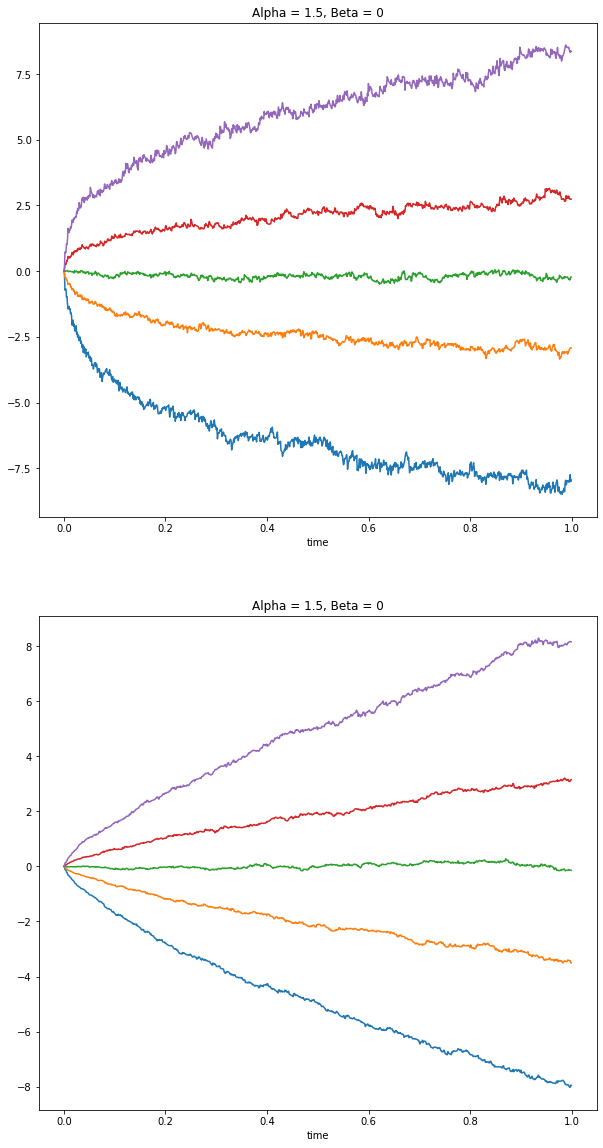

In [55]:
fig_q, axs_q = plt.subplots(nrows = 2, ncols = 1, figsize = ( Image_width, 2 * Image_width))
for i, X in enumerate([Quantile_FSM1_5_03, Quantile_FSM1_5_07]):
    ax_q = axs_q[i]
    ax_q.plot(t[:-1], X.T);
    ax_q.set_xlabel("time")
    ax_q.set_title(f"Alpha = {alpha15}, Beta = {beta15}");

### Ornstein-Uhlenbeck process

In [ ]:

@cache("get_OSP")
def get_OSP():
    # return integral_form_simulation(0.3, 1.5, 0, N_trajectories=M)
OSP = get_OSP()

In [ ]:

Quantile_OSP = np.zeros([len(ps), N-1])
for Np, p in enumerate(ps):
    Quantile_OSP[Np,:] = np.squeeze(equantile_proces(OSP, p))
    

In [ ]:
fig_q, axs_q = plt.subplots(nrows = 1, ncols = 1, figsize = ( Image_width, Image_width))
ax_q = axs_q[i]
ax_q.plot(t[:-1], Quantile_OSP.T);
ax_q.set_xlabel("time")
ax_q.set_title(f"Alpha = {alpha15}, Beta = {beta15}");

## self-similar

### Brownian Motion

In [ ]:
c = 4

In [ ]:

N_scaled = int(c ** (-alpha) * N)

X1 = X_Brownian_motion[-1, :int(M//2)]
X2 = c * X_Brownian_motion[N_scaled, int(M//2):]

p_val = ks_2samp(X1, X2)
print(p_val)

### Alpha-stable 1.5

In [ ]:
c = 8


In [ ]:

N_scaled = int(c ** (-alpha15) * N)

X1 = X_1_5_stable_motion[-1, :int(M//2)]
X2 = c * X_1_5_stable_motion[N_scaled, int(M//2):]

p_val = ks_2samp(X1, X2)
print(p_val)

### Fractional Brownian motion 0.3 & 0.7

### Fractional 1.5 Stable motion 0.3 & 0.7

### Ornstein-Uhlenbeck process

## characteristic function

### Brownian motion

In [ ]:
N_char = 10 ** 2
t_char = np.linspace(-3,3, N_char)


In [ ]:
phi = characteristic_proces_r_i(t_char, X_Brownian_motion)

plt.plot(phi[0])
plt.plot(phi[1])


### 1.5 stable motion

In [ ]:
phi = characteristic_proces_r_i(t_char, X_1_5_stable_motion)

plt.plot(phi[0])
plt.plot(phi[1])

### Fractional Brownian motion 0.3 & 0.7

### Fractional 1.5 Stable motion 0.3 & 0.7

### Ornstein-Uhlenbeck process

## TAMSD EAMSD (EATAMSD?)

### Brownian motion

In [ ]:
X = X_Brownian_motion[:,0]
Y_TAMSD = np.zeros(N - 1)

for i in range( N - 1):
    Y_TAMSD[i] = TAMSD(X, i)

In [ ]:
plt.plot(Y_TAMSD)

In [ ]:
Y_EAMSD = np.zeros(N - 1)

for i in range( N - 1):
    Y_EAMSD[i] = EAMSD(X_Brownian_motion, i)


In [ ]:
plt.plot(Y_EAMSD)

### 1.5 stable motion

In [ ]:
X = X_1_5_stable_motion[:,0]
Y_TAMSD1_5 = np.zeros(N - 1)

for i in range( N - 1):
    Y_TAMSD1_5[i] = TAMSD(X, i)

In [ ]:
plt.plot(Y_TAMSD1_5)

In [ ]:
Y_EAMSD1_5 = np.zeros(N - 1)

for i in range( N - 1):
    Y_EAMSD1_5[i] = EAMSD(X_1_5_stable_motion, i)


In [ ]:
plt.plot(Y_EAMSD1_5)

## Distribution

### Brownian motion

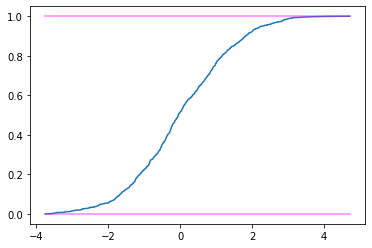

In [61]:
x = CDF2(X_Brownian_motion[100,:])[0]
plt.plot(x, np.linspace(0,1, len(x)));

plt.plot(x, x * 0 + 1, color = "magenta", linewidth = 0.4);
plt.plot(x, x * 0, color = "magenta", linewidth = 0.4);

### 1.5 stable

(-10.0, 10.0)

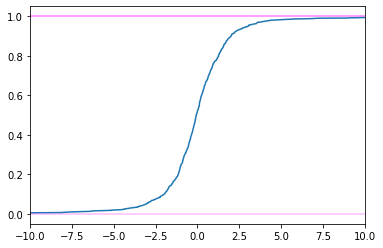

In [68]:
x = CDF2(X_1_5_stable_motion[100,:])[0]
plt.plot(x, np.linspace(0,1, len(x)));
plt.plot(x, x * 0 + 1, color = "magenta", linewidth = 0.4);
plt.plot(x, x * 0, color = "magenta", linewidth = 0.4);
# plt.plot(x, np.linspace(0,1, len(x)));
plt.xlim([-10, 10])


In [62]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f